# Import Statements

<b>The main objective is to understand the shopping behavior with respect to the various segments formed in the earlier workbook.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib. pyplot as plt
import seaborn as sns
import pickle

# Data Load

In [2]:
purchase_df=pd.read_csv(r'C:\Users\sidha\Desktop\proj\purchase_data.csv')
purchase_df.head(10)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
5,200000001,23,0,0,0,0,0,1.50,1.90,1.99,...,0,0,0,0,0,47,1,110866,1,0
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,0,47,1,110866,1,0
7,200000001,37,0,0,0,2,1,1.50,1.90,1.99,...,0,0,0,0,0,47,1,110866,1,0
8,200000001,41,0,0,0,0,0,1.35,1.58,1.97,...,1,0,0,0,0,47,1,110866,1,0
9,200000001,43,0,0,0,0,0,1.35,1.58,1.97,...,1,0,0,0,0,47,1,110866,1,0


In [3]:
#Checking for null values in the data
purchase_df.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

# Loading Models from Segementation Workbook

In [4]:
scaler=pickle.load(open('scaler.pickle','rb'))
pca=pickle.load(open('pca.pickle','rb'))
kmeans_pca=pickle.load(open('kmeans_pca.pickle','rb'))

# Standardization

<b>The scaler model from the segmentation workbook is used to scale the segment part of the purchase data

In [5]:
seg_data=purchase_df.iloc[:,17:]
seg_data.head(10)
scaled_seg_data=scaler.transform(seg_data)

In [6]:
temp=pd.DataFrame(scaled_seg_data,columns=seg_data.columns.values)

In [7]:
temp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,0.946616,-0.063372,-0.264793,0.296823,-0.90973
1,-0.917399,-0.993024,0.946616,-0.063372,-0.264793,0.296823,-0.90973
2,-0.917399,-0.993024,0.946616,-0.063372,-0.264793,0.296823,-0.90973
3,-0.917399,-0.993024,0.946616,-0.063372,-0.264793,0.296823,-0.90973
4,-0.917399,-0.993024,0.946616,-0.063372,-0.264793,0.296823,-0.90973
...,...,...,...,...,...,...,...
58688,-0.917399,-0.993024,0.519866,-0.063372,-0.000221,0.296823,-0.90973
58689,-0.917399,-0.993024,0.519866,-0.063372,-0.000221,0.296823,-0.90973
58690,-0.917399,-0.993024,0.519866,-0.063372,-0.000221,0.296823,-0.90973
58691,-0.917399,-0.993024,0.519866,-0.063372,-0.000221,0.296823,-0.90973


# PCA

<b>Applying the PCA model from the segmentation workbook on the standardized data from above

In [8]:
pca_scaled_seg_data=pca.transform(scaled_seg_data)

In [9]:
pca_scaled_seg_data

array([[ 0.36215223, -0.63955673,  1.46270631],
       [ 0.36215223, -0.63955673,  1.46270631],
       [ 0.36215223, -0.63955673,  1.46270631],
       ...,
       [ 0.3617637 , -0.7398037 ,  1.15875419],
       [ 0.3617637 , -0.7398037 ,  1.15875419],
       [ 0.3617637 , -0.7398037 ,  1.15875419]])

In [10]:
temp=pd.DataFrame(pca_scaled_seg_data,columns=['component 1','component 2','component 3'])

In [11]:
temp

,component 1,component 2,component 3
0,0.362152,-0.639557,1.462706
1,0.362152,-0.639557,1.462706
2,0.362152,-0.639557,1.462706
3,0.362152,-0.639557,1.462706
4,0.362152,-0.639557,1.462706
...,...,...,...
58688,0.361764,-0.739804,1.158754
58689,0.361764,-0.739804,1.158754
58690,0.361764,-0.739804,1.158754
58691,0.361764,-0.739804,1.158754


# K means on Principal Components

In [12]:
pca_scaled_seg_data_k=kmeans_pca.predict(pca_scaled_seg_data)
pca_scaled_seg_data_k
temp=pd.DataFrame(pca_scaled_seg_data_k,columns=['Segment'])

<b>Stitching back segment information to the purchase data

In [13]:
purchase_df['Segment']=temp['Segment']
purchase_df

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,0,0,0,0,42,1,120946,1,0,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,42,1,120946,1,0,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,42,1,120946,1,0,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,42,1,120946,1,0,0


<b>At this point we have enriched the data with the segment they belong to, this will be used to collectively look at segment behavior, and understand the average choices individuals from each of the customer make(Computed after the individual customer analysis)

# Analysis by individual customers(Descriptive)

In [14]:
temp1=purchase_df[['ID','Incidence']]
grptemp1=temp1.groupby(['ID']).count()
grptemp1=grptemp1.rename(columns={'Incidence':'N_visits'})

In [15]:
temp2=purchase_df[['ID','Incidence']]
grptemp2=temp2.groupby(['ID'],as_index=False).sum()
grptemp2=grptemp2.set_index('ID')
grptemp2=grptemp2.rename(columns={'Incidence':'N_Purchases'})

In [16]:
temp3=grptemp1.join(grptemp2)

In [17]:
temp3['Average_Purchase']=temp3['N_Purchases']/temp3['N_visits']

<b>Tracking number of store visits per customer, numbers of purchases of interest, average purchase of interest per store visit, and the segment they belong to

In [18]:
temp4=purchase_df[['ID','Segment']].groupby(['ID']).max()
temp4.head()
temp5=temp3.join(temp4)
temp5.head()

,N_visits,N_Purchases,Average_Purchase,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,3
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,1


<b>Over here, we are trying to look at the store visits, purchases in category of interest, average purchase of category of interest per vist. There is a huge variation if you look at individual customers. Also taking an average on the whole dataset migh point us in the wrong direction, as there is expected to a significant variation in the choice patterns.<br><br>
To overcome this, we are will conduct segment analysis, which could serve as a much better indicator.

# Segment Analysis(Descriptive)

<b>Segment Proportions

In [19]:
seg_data=temp5[['N_visits','Segment']].groupby(['Segment']).count()/temp5.shape[0]
seg_data=seg_data.rename(columns={'N_visits':'Segment Proportion'})
seg_data

,Segment Proportion
Segment,
0,0.378
1,0.222
2,0.206
3,0.194


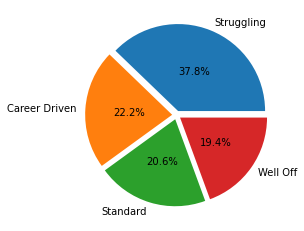

In [20]:
data=seg_data['Segment Proportion'].tolist()
data
plt.pie(data, autopct="%.1f%%", explode=[0.05]*4, labels=['Struggling','Career Driven','Standard','Well Off'], pctdistance=0.5)
plt.show()

<b> Based on the results we have, the biggest chunk of our customers belong to the struggling category. The other 3 i.e. Carrer Driven, Standard and Well have similar sized chunks of customer. This might be a bit counterintuitive as opposite to assumption the standard segment is not the biggest chunk.

In [21]:
temp5.groupby(['Segment']).mean()

,N_visits,N_Purchases,Average_Purchase
Segment,,,
0,113.894180,22.793651,0.201679
1,123.216216,39.603604,0.281944
2,117.699029,24.902913,0.212773
3,117.185567,34.731959,0.285639


In [22]:
temp5.groupby(['Segment']).std()

,N_visits,N_Purchases,Average_Purchase
Segment,,,
0,16.397308,13.803513,0.120305
1,44.730792,53.551552,0.199518
2,19.039605,16.774464,0.126603
3,20.794796,26.003011,0.172293


<BarContainer object of 4 artists>

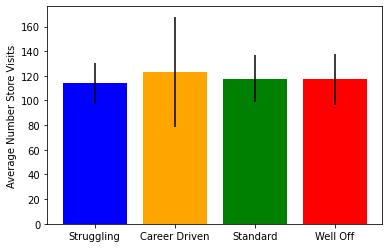

In [23]:
x=temp5.groupby(['Segment']).mean()['N_visits'].tolist()
y=temp5.groupby(['Segment']).std()['N_visits'].tolist()
plt.ylabel('Average Number Store Visits')
plt.bar(['Struggling','Career Driven','Standard','Well Off'],x,yerr=y,color=['blue','orange','green','red'])

<b>The average number of store visits across segments look very similar to each other, with the only notable difference being - Career Driven has the maximum variability, possibly due to individuals falling on both spectrum of the scale. It is not as homogenous as the rest of segments.

<BarContainer object of 4 artists>

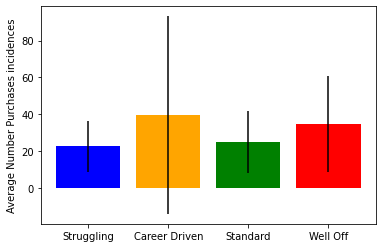

In [24]:
x=temp5.groupby(['Segment']).mean()['N_Purchases'].tolist()
y=temp5.groupby(['Segment']).std()['N_Purchases'].tolist()
plt.ylabel('Average Number Purchases incidences')
plt.bar(['Struggling','Career Driven','Standard','Well Off'],x,yerr=y,color=['blue','orange','green','red'])

<b>The segments seem to be divided among 2 sets of behavior, with the career driven and well offs falling on the higher end average number of purchase incidence, where as struggling and well offs falling on the lower end of the scale.
Also there is a very high variability in the career driven segment, indication of heterogenous purchase habits regarding the product of interest.

<BarContainer object of 4 artists>

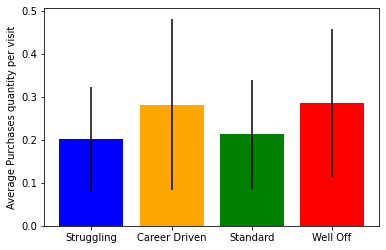

In [25]:
x=temp5.groupby(['Segment']).mean()['Average_Purchase'].tolist()
y=temp5.groupby(['Segment']).std()['Average_Purchase'].tolist()
plt.ylabel('Average Purchases quantity per visit')
plt.bar(['Struggling','Career Driven','Standard','Well Off'],x,yerr=y,color=['blue','orange','green','red'])

<b>Based on the average purchase quantity per visit, we can visualize segments in 2 main categories. The first one being struggling category and well of category. These are segments who on an average buy less per visit, but also buy consisently resulting in a lower variation.<br><br>
The second group is that of career driven and well off, who on an average buy higher quantities per store visit, but the groups are more bipolar, leading to inconsistent shopping patterns

In [26]:
purchase_df1=purchase_df[purchase_df['Incidence']==1]
purchase_df1.head(10)
brand_dummies=pd.get_dummies(purchase_df1['Brand'],prefix='Brand',prefix_sep='-')
brand_dummies['ID']=purchase_df1['ID']
brand_dummies['Segment']=purchase_df1['Segment']
temp=brand_dummies.groupby(['ID']).mean()
temp1=temp.groupby('Segment').mean()
temp1

,Brand-1,Brand-2,Brand-3,Brand-4,Brand-5
Segment,,,,,
0,0.137567,0.676957,0.021404,0.066358,0.097714
1,0.072215,0.152692,0.039616,0.111382,0.624095
2,0.251186,0.396502,0.156481,0.059474,0.136357
3,0.042361,0.118632,0.029988,0.610577,0.198442


([<matplotlib.axis.YTick at 0x22bd24c1490>,
 [Text(0, 0, 'Struggling'),
  Text(0, 1, 'Career Driven'),
  Text(0, 2, 'Standard'),
  Text(0, 3, 'Well Off')])

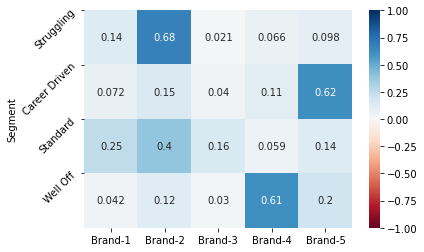

In [27]:
sns.heatmap(temp1,vmin=-1, vmax=1, annot=True,cmap='RdBu')
plt.yticks([0,1,2,3],['Struggling','Career Driven','Standard','Well Off'],rotation=45)

<b>Notable Features across segments:<br><br>
Individuals in struggling segment prefer Brand 2 over all the other categories<br>
Individuals in Career Driven segment prefer brand 5 over all the other categories<br>
Individuals in Standard segment prefer brand 2, followed by brand 1 over all the other categories<br>
Individuals in Well off segment prefer brand 4,followed by brand 5 over all the oter categories<br>  
<br>
Based on the above visual, it seems like individuals in the Struggling segment and the standard segment have similar choice patterns, with the most popular choice being Brand 2, followed by Brand 1
<br><br>
Based on the above visual, it seems like individuals in the Career Driven segment and the Well off segment have similar choice patterns, with the most popular choice being Brand 4 and Brand 5.

This can be associated with factors like price of the brand, quality/quantity offered by the brand, the exact location and time of the purchase, alongiside choices and behavorial preferences of individuals.


# Revenue

<B>Analysis of Revenue contributions by each segments for each individual brand

In [28]:
brand1_df=purchase_df[purchase_df['Brand']==1]
brand1_df=brand1_df[['Segment','Price_1','Quantity']]
brand1_df['Revenue1']=brand1_df['Price_1']*brand1_df['Quantity']
brand1_df=brand1_df.groupby(['Segment'],as_index=False).sum()
brand1_df
#ignore the values in the price_1 columns, as they donot make sense once the summing operation is done. 
#The summing operation is done to get the sum of revenue, grouped by Segments.

,Segment,Price_1,Quantity,Revenue1
0,0,676.56,1703,2258.90
1,1,233.91,544,736.09
2,2,709.87,1948,2611.19
3,3,191.15,522,699.47


<b>In line with what was seen by the brand preferences from the heat map above, the major revenue generated by brand 1 is from the Struggling and the Standard segment.

In [34]:
brand2_df=purchase_df[purchase_df['Brand']==2]
brand2_df=brand2_df[['Segment','Price_2','Quantity']]
brand2_df['Revenue2']=brand2_df['Price_2']*brand2_df['Quantity']
brand2_df=brand2_df.groupby(['Segment'],as_index=False).sum()
brand2_df

,Segment,Price_2,Quantity,Revenue2
0,0,5045.83,8196,13909.78
1,1,713.42,1063,1791.78
2,2,1551.69,2806,4768.52
3,3,460.93,763,1298.23


<b>In line with what was seen by the brand preferences from the heat map above, the major revenue generated by brand 1 is from the Struggling and the Standard segment.

In [35]:
brand3_df=purchase_df[purchase_df['Brand']==3]
brand3_df=brand3_df[['Segment','Price_3','Quantity']]
brand3_df['Revenue3']=brand3_df['Price_3']*brand3_df['Quantity']
brand3_df=brand3_df.groupby(['Segment'],as_index=False).sum()
brand3_df

,Segment,Price_3,Quantity,Revenue3
0,0,240.81,357,722.06
1,1,231.43,331,664.75
2,2,1048.24,1944,3909.17
3,3,172.18,362,725.54


<b>The main revenue generating segment for brand 3 has been the Career driven segment.

In [39]:
brand4_df=purchase_df[purchase_df['Brand']==4]
brand4_df=brand4_df[['Segment','Price_4','Quantity']]
brand4_df['Revenue4']=brand4_df['Price_4']*brand4_df['Quantity']
brand4_df=brand4_df.groupby(['Segment'],as_index=False).sum()
brand4_df

,Segment,Price_4,Quantity,Revenue4
0,0,608.61,841,1805.59
1,1,744.22,1110,2363.84
2,2,271.53,402,861.38
3,3,4666.59,6524,14009.29


<b>The major contribution to Brand 4, comes from the Well off segment, followed by the career Driven Segment

In [37]:
brand5_df=purchase_df[purchase_df['Brand']==5]
brand5_df=brand5_df[['Segment','Price_5','Quantity']]
brand5_df['Revenue5']=brand5_df['Price_5']*brand5_df['Quantity']
brand5_df=brand5_df.groupby(['Segment'],as_index=False).sum()
brand5_df

,Segment,Price_5,Quantity,Revenue5
0,0,1173.72,858,2214.82
1,1,8854.69,7336,19456.74
2,2,1271.51,926,2439.75
3,3,1861.37,2078,5509.69


<b>The major contribution to Brand 5, comes from the Career Driven segment, followed by the Well off Segment

In [33]:
rev=brand1_df
rev=rev[['Segment','Revenue1']]
rev['Revenue2']=brand2_df[['Revenue2']]
rev['Revenue3']=brand3_df[['Revenue3']]
rev['Revenue4']=brand4_df[['Revenue4']]
rev['Revenue5']=brand5_df[['Revenue5']]
rev['Total Revenue']=(rev['Revenue1']+rev['Revenue2']+rev['Revenue3']+rev['Revenue4']+rev['Revenue5'])
rev['Segment Proportions']=seg_data['Segment Proportion']
rev=rev.replace({'Segment':{0:"Struggling",1:"Career Driven",2:"Standard",3:"Well off"}})
rev=rev.set_index(["Segment"])
rev

<ipython-input-33-dcd0a3e044b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev['Revenue2']=brand2_df[['Revenue2']]


,Revenue1,Revenue2,Revenue3,Revenue4,Revenue5,Total Revenue,Segment Proportions
Segment,,,,,,,
Struggling,2258.90,13909.78,722.06,1805.59,2214.82,20911.15,0.378
Career Driven,736.09,1791.78,664.75,2363.84,19456.74,25013.20,0.222
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Well off,699.47,1298.23,725.54,14009.29,5509.69,22242.22,0.194


<b>Based on the table, we can see the the max revenue generating brands are brand 4 and brand 5. This can be associated to the customer bases of these brands, mainly consisting of individuals from the Well off and the career driven segment. These individuals have the maximum spending power and this can be seen translating in the Revenue as well.<br><br>
In the next workbook we will be comparing more of the traits and attributes associates with brand 4(substitute rival brand) and brand 5(Our brand)